# Data Collection & Exploratory

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Combined_Jobs_Final.csv')

In [3]:
df.head(3)

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.0,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.0,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.0,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC


In [4]:
print(len(df))
df = df[['Status', 'Title', 'Position', 'Company', 'Job.Description']]
print(len(df))

84090
84090


In [5]:
df['Title'][5]

'Receptionist @ Mind of Beauty Day Spa'

In [6]:
df['Job.Description'][5]

'We are a group of professional massage therapists. We are currently looking for a receptionist who can speak both Mandarin and English fluently. Please apply if you are interested! \r\n\r\n● Act as a receptionist\r\n● Support the staff when needed \r\n'

In [7]:
df.isnull().sum()
df.fillna('',inplace=True)
df.isnull().sum()

Status             0
Title              0
Position           0
Company            0
Job.Description    0
dtype: int64

In [8]:
df = df.sample(n=1000,random_state=42)

In [9]:
df.shape

(1000, 5)

# Data Cleaning & Pre-processing

In [10]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
# nltk.download('punkt')
# nltk.download('stopwords')

In [11]:
ps = PorterStemmer()

In [12]:
def cleaning(input):
    cleaned = re.sub(r'[^a-zA-Z0-9\s]','',input)
    tokens = nltk.word_tokenize(cleaned.lower())
    stemming = [ps.stem(word) for word in tokens if word not in stopwords.words('english')]
    
    return " ".join(stemming)

In [13]:
cleaned = cleaning("lunged where is the maddening recommendation at? \n\r &%$@%& @grooving")

In [14]:
print(cleaned)

lung madden recommend groov


In [15]:
# ETA 30 seconds
df['Title'] = df['Title'].astype(str).apply(lambda x:cleaning(x))
df['Job.Description'] = df['Job.Description'].astype(str).apply(lambda x:cleaning(x))
df['Position'] = df['Position'].astype(str).apply(lambda x: cleaning(x))

In [16]:
df['Details'] = df['Job.Description']+" "+df['Title']+df['Position']

In [17]:
df.head(10)

,Status,Title,Position,Company,Job.Description,Details
64119,open,site director knowledg univers,site director,Knowledge Universe,job summari knowledg univers ku site director ...,job summari knowledg univers ku site director ...
35827,open,administr assist officeteam,administr assist,OfficeTeam,ref id 03110118480classif secretaryadmin asstc...,ref id 03110118480classif secretaryadmin asstc...
72100,open,account manag chi payment system,account manag,CHI Payment Systems,yoursquor energet motiv hardwork look prosper ...,yoursquor energet motiv hardwork look prosper ...
46355,open,outsid wholesal sale rep parttim river front c...,outsid wholesal sale rep parttim,River Front Chrysler Jeep Dodge,outsid wholesal sale rep job respons sale repr...,outsid wholesal sale rep job respons sale repr...
34166,open,custom servic rep help peopl hear loss captioncal,custom servic rep help peopl hear loss,CaptionCall,captioncal commun assist imagin life without t...,captioncal commun assist imagin life without t...
43584,open,bookkeep accountemp,bookkeep,Accountemps,ref id00900140759classificationbookkeepercompe...,ref id00900140759classificationbookkeepercompe...
78169,open,nuclear medicin tech prn hcaeast florida,nuclear medicin tech prn,HCA-East Florida,job descriptionnuclear medicin tech prnjob num...,job descriptionnuclear medicin tech prnjob num...
2211,open,construct project admin need asap officeteam,construct project admin need asap,OfficeTeam,ref id 001609715006classif officeadministr sup...,ref id 001609715006classif officeadministr sup...
6936,open,account clerk accountemp,account clerk,Accountemps,ref id03410110048classificationaccount clerkco...,ref id03410110048classificationaccount clerkco...
7478,open,cashier murphi usa,cashier,Murphy USA,job jobwhen know make differ live around youwh...,job jobwhen know make differ live around youwh...


In [18]:
df['Details'][7478]

'job jobwhen know make differ live around youwhen go work everi day look forward day ahead youwhen decis make job realli matter serv cashier whether goal begin fantast fulltim career great parttim job talent valu respect murphi usa success cashier need energi excel work ethic great attitud smile face compani deliv legendari custom servic murphi usa associ known provid respons includeprovid prompt effici courteou custom experiencerespond resolv custom request concernsassist custom purchas fuel transactionsoper cash registerrestock merchandiseperform job relat duti assigneda job job career murphi usa murphi understand career much paycheck benefit that best provid support enjoy atmospher possibl employe reason murphi usa great career choiceenjoy workmurphi usa offer fast pace environ bright talent individu will work hard valu make differ flexibl schedulemurphi usa help schedul work around busi life advanc opportunitiesmurphi usa oper 1000 locat 20 state ad new locat everi year growth prov

# Model Training

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
tfif = TfidfVectorizer(stop_words='english')
matrix = tfif.fit_transform(df['Details'])
similarity = cosine_similarity(matrix)

In [21]:
similarity[0]

array([1.        , 0.04322045, 0.02131549, 0.01550165, 0.04964995,
       0.02036638, 0.02700408, 0.03505718, 0.01901014, 0.03482128,
       0.01090836, 0.03416738, 0.01894575, 0.03853524, 0.01006187,
       0.00740002, 0.04901953, 0.04287255, 0.03806342, 0.01972925,
       0.        , 0.01875441, 0.02177422, 0.01489302, 0.05954369,
       0.05355905, 0.05433242, 0.02274386, 0.0140996 , 0.05815589,
       0.01830453, 0.04464644, 0.0140905 , 0.02819856, 0.00607121,
       0.06025036, 0.03092983, 0.07565575, 0.18257069, 0.0263457 ,
       0.0469138 , 0.03061829, 0.00751644, 0.04104977, 0.02087271,
       0.02806569, 0.06291036, 0.02108939, 0.03732435, 0.00736299,
       0.0076782 , 0.03300888, 0.12100519, 0.01809469, 0.01081486,
       0.01748105, 0.06821273, 0.07844168, 0.01447423, 0.14241843,
       0.04932429, 0.02560791, 0.03148296, 0.04702356, 0.05872405,
       0.00704433, 0.02982425, 0.03086835, 0.02294434, 0.0392745 ,
       0.00534949, 0.00363448, 0.09515019, 0.03056481, 0.03026

In [22]:
sorting = sorted(list(enumerate(similarity[0])), key=lambda x: x[1], reverse=True)[1:20]

In [23]:
print(sorting)

[(276, 0.9733772868873092), (730, 0.5181424118134745), (81, 0.49306292063609425), (917, 0.49306292063609425), (252, 0.2585811153172217), (128, 0.24712958824951992), (360, 0.23664048105861918), (825, 0.21870641716425473), (629, 0.2088881569389071), (38, 0.18257068622788095), (245, 0.1796380318454525), (114, 0.17263108553231282), (254, 0.16811344897738498), (298, 0.1446572732370542), (59, 0.14241842988596462), (940, 0.13972634715716156), (195, 0.1368714545586078), (284, 0.13625519998756502), (965, 0.13588092414113367)]


# Scatterplot

In [32]:
import matplotlib.pyplot as plt

In [39]:
# Extract x and y coordinates
x = [coord[1] for coord in sorting]
y = [coord[0] for coord in sorting]

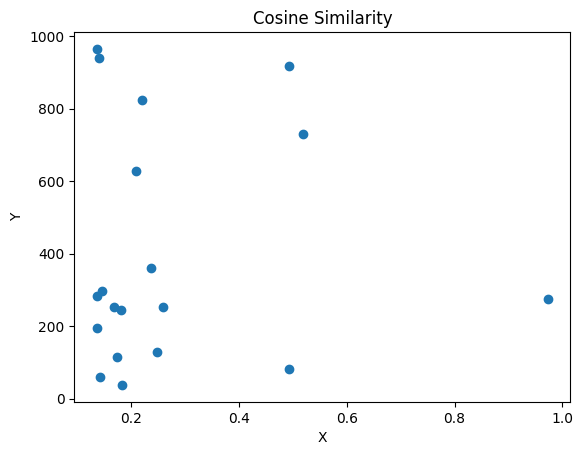

In [40]:
# Adding labels and title
plt.xlabel('Cosine Similarity')
plt.ylabel('Index Value')
plt.title('Cosine Similarity')

# Plotting the scatter plot
plt.scatter(x, y)

# Backend Job Recommendation System

In [24]:
def recommendation(title):
    placeIndex = df[df['Title'] == title].index[0]
    placeIndex = df.index.get_loc(placeIndex)
    distances = sorted(list(enumerate(similarity[placeIndex])),key=lambda x: x[1], reverse=True)[1:20]
    
    jobs = []
    for i in distances:
        jobs.append(df.iloc[i[0]].Title)
    return jobs

In [25]:
recommendation("site director knowledg univers")

['site director knowledg univers educ llc',
 'teacher knowledg univers',
 'assist teacher knowledg univers',
 'assist teacher knowledg univers',
 'cook knowledg univers',
 'immedi open assist teacher la petit academi',
 'summer school age assist children courtyard',
 'hvac instructor vatterott educ center',
 'temporari coordin site oper macyscom maci',
 'fellowship program coordin connecticut children medic center',
 'medic offic assist instructor concord career colleg inc',
 'youth camp residenti assist activ coordin new york ny el educ servic',
 'pharmaci adjunct instructor brown macki colleg',
 'secur offic regular securita usa',
 'secur offic 100000 job coalit securita usa',
 'school day camp counselor ii ymca greenvil',
 'faculti call zenith educ group',
 'faculti support specialist zenith educ group',
 'handbag sell specialist part time bloomingdal chevi chase md bloomingdal']

In [26]:
import pickle
pickle.dump(df, open("df.pkl", 'wb'))
pickle.dump(similarity, open('similarity.pkl', 'wb'))